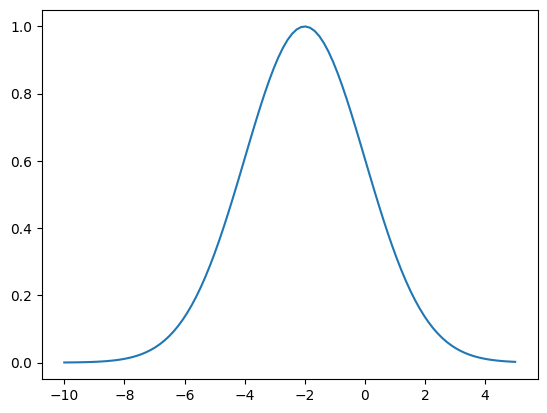

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from pyrtid.utils import NDArrayFloat


def gaussian_pdf(x: NDArrayFloat, std: float, mean: float) -> NDArrayFloat:
    return 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-((x - mean) ** 2) / (2 * std**2))


def scaled_gaussian_pdf(x: NDArrayFloat, std: float, mean: float) -> NDArrayFloat:
    return np.exp(-((x - mean) ** 2) / (2 * std**2))


def dscaled_gaussian_pdf(x: NDArrayFloat, std: float, mean: float) -> NDArrayFloat:
    return -(x - mean) / (std**2) * scaled_gaussian_pdf(x, std, mean)


x = np.linspace(-10, 5, 100)
y = scaled_gaussian_pdf(x, 2.0, -2.0)

plt.plot(x, y)

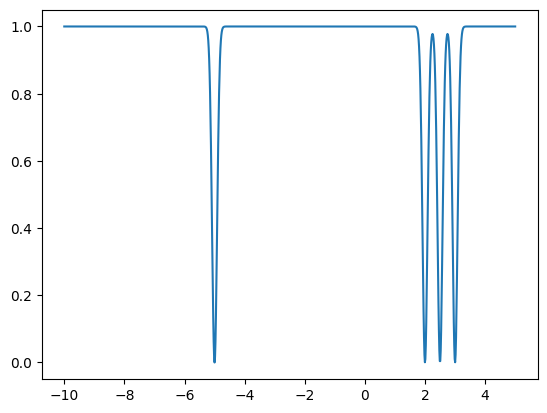

In [39]:
from typing import List


def gaussian_distance_from_modes(x: NDArrayFloat, modes: List[float]) -> NDArrayFloat:
    std = np.min(np.diff(sorted(modes))) / 6.0
    return 1.0 - np.sum([scaled_gaussian_pdf(x, std, mode) for mode in modes], axis=0)


def dgaussian_distance_from_modes(x: NDArrayFloat, modes: List[float]) -> NDArrayFloat:
    std = np.min(np.diff(sorted(modes))) / 6.0
    return 1.0 - np.sum([dscaled_gaussian_pdf(x, std, mode) for mode in modes], axis=0)


x = np.linspace(-10, 5, 1000)
modes = [-5.0, 2.0, 2.5, 3.0]

y = gaussian_distance_from_modes(x, modes)

plt.plot(x, y)

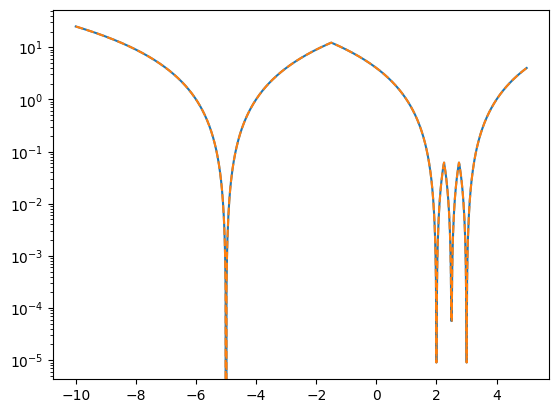

In [40]:
from typing import List


def min_squared_distance(x: NDArrayFloat, modes: List[float]) -> NDArrayFloat:
    return np.min([(x - mode) ** 2 for mode in modes], axis=0)


def get_clostest_mode(x: NDArrayFloat, modes: NDArrayFloat) -> NDArrayFloat:
    return modes[np.digitize(x, modes[:-1] + np.diff(modes) / 2.0)]


def min_squared_distance2(x: NDArrayFloat, modes: List[float]) -> NDArrayFloat:
    return (x - get_clostest_mode(x, np.asarray(modes))) ** 2


def dmin_squared_distance(x: NDArrayFloat, modes: List[float]) -> NDArrayFloat:
    return np.min([2 * (x - mode) for mode in modes], axis=0)


x = np.linspace(-10, 5, 1000)
modes = [-5.0, 2.0, 2.5, 3.0]
y = min_squared_distance(x, modes)
y2 = min_squared_distance2(x, modes)
plt.semilogy(x, y)
plt.semilogy(x, y2, linestyle="--")